<a href="https://colab.research.google.com/github/kai-lim/NLP_course/blob/main/Practical_1_Intro_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NLP with Python

A brief introduction to useful Python packages and functions for NLP and data manipulation, and some initial exploration of some example data.

Written by Sumithra Velupillai June 2019, updated January 2021

Some of the material from or inspired by: https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a


## Working with datasets and packages

Importing packages you need for a project is the first step.

pandas is a very useful package for working with datasets

In [ ]:
import pandas as pd
import numpy as np

## Data visualization

There are many packages for visualisations in Python - matplotlib is one of the core packages, 

seaborn has some very nice functionalities

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## NLP

Two main NLP packages are commonly used when working in the Python environment:

spaCy: https://spacy.io/

nltk: https://www.nltk.org/

We will load some of their functions and resources too for the English language

spaCy has a default language model for English that we will load into the variable 'nlp'

In [ ]:
import spacy
nlp = spacy.load('en')

nltk has many functions for language processing tasks. Here we will use their stopwords, their definition of punctuation, and one of their word tokenizers and one of their lemmatizers

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## Other useful packages

We will also load some packages from one of the most commonly used machine learning libraries: 

scikit-learn: https://scikit-learn.org/stable/

And some other useful packages

Code chunk below: 
Using %matplotlib inline, graphs will be included in the notebook, next to the code

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline
#matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
from collections import Counter

## Data

We'll start by opening some data. This is data we will also use in the machine learning classification practical later this week. The data are medical transcriptions from mtsamples: https://www.mtsamples.com/

We have selected a subset of documents just to explore and try to get an idea of what is in them in terms of texts. The data has been saved in a spreadsheet that we'll open from a URL.

In [ ]:
xlds = 'https://github.com/KCL-Health-NLP/nlp_examples/blob/master/classification/classification_trainingdata.xlsx?raw=true'
df = pd.read_excel(xlds)

How many documents do we have?

In [ ]:
len(df)

248

What does this dataframe look like? 

In [ ]:
df.head()

,Unnamed: 0,label,txt
0,0,hematology,_x000D_\n _x000D_\n _x000D_\n_x0...
1,1,hematology,_x000D_\n _x000D_\n _x000D_\n_x0...
2,2,pediatrics,_x000D_\n _x000D_\n _x000D_\n_x0...
3,3,hematology,_x000D_\n _x000D_\n _x000D_\n_x0...
4,4,psychiatrypsychology,_x000D_\n _x000D_\n _x000D_\n_x0...


There are a lot of newline characters that we can remove and replace with just one. This makes the data more readable.

In [ ]:
df['txt'] = df['txt'].str.replace('\r\n+','\n')
df['txt'] = df['txt'].str.replace('\n +','\n')
df['txt'] = df['txt'].str.replace('\n+','\n')
df['txt'] = df['txt'].str.replace('_x000D_\n+','\n')

So there are two main columns: 'label' and 'txt'. Each row in the dataframe is thus a text with a label. What does the label indicate?

Let's look at one of the documents. 

In [ ]:
df['txt'][0]

"\n\n\n\n\nREASON FOR CONSULTATION:\nThrombocytopenia.\nHISTORY OF PRESENT ILLNESS:\nMrs. XXX is a 17-year-old lady who is going to be 18 in about 3 weeks.  She has been referred for the further evaluation of her thrombocytopenia.  This thrombocytopenia was detected on a routine blood test performed on the 10th of June 2006.  Her hemoglobin was 13.3 with white count of 11.8 at that time.  Her lymphocyte count was 6.7.  The patient, subsequently, had a CBC repeated on the 10th at Hospital where her hemoglobin was 12.4 with a platelet count of 26,000.  She had a repeat of her CBC again on the 12th of June 2006 with hemoglobin of 14, white count of 11.6 with an increase in the number of lymphocytes.  Platelet count was 38.  Her rapid strep screen was negative but the infectious mononucleosis screen is positive.  The patient had a normal platelet count prior too and she is being evaluated for this low platelet count.\nThe patient gives a history of feeling generally unwell for a couple of 

Do you get a sense for what these texts might look like? Try looking at some other examples.

In [ ]:
df['txt'][1]

"\n\n\n\n\nREASON FOR CONSULTATION: \nWe were asked to see the patient in regards to a brain tumor.\nHISTORY OF PRESENT ILLNESS: \nShe was initially diagnosed in September of this year with a glioblastoma multiforme.  She presented with several lesions in her brain and a biopsy confirmed the diagnosis.  She was seen by Dr. X in our group.  Because of her living arrangement, she elected to have treatment through the hospital radiation department and oncology department.  Details of her treatment are not available at the time of this dictation.  Her family has a packet of Temodar 100-mg pills.  She is admitted now with increasing confusion.  A CT shows increase in size of the lesions compared to the preoperative scan.  We are asked to comment on her treatment at this point.  She herself is confused and is unable to provide further history.  \nPAST MEDICAL HISTORY: \nFrom her old chart:  No known past medical history prior to the diagnosis.\nSOCIAL HISTORY:  \nShe was living alone and is 

One way of exploring the data and trying to understand more about this corpus is to tokenize the corpus into its individual words, and looking at the most frequent words. Let's see how we can use spaCy and nltk for this.

With spaCy, we can apply their default English language model on all texts in one go. Remember that we loaded their language model in the variable 'nlp' above. With pandas, we can apply this on all rows in the dataframe, and save in a new column 'spacynlp':

In [ ]:
df['spacynlp'] = df['txt'].apply(nlp)

Let's look at the first rows in the dataframe again.

In [ ]:
df.head()

,Unnamed: 0,label,txt,spacynlp
0,0,hematology,\n\n\n\n\nREASON FOR CONSULTATION:\nThrombocyt...,"(\n\n\n\n\n, REASON, FOR, CONSULTATION, :, \n,..."
1,1,hematology,\n\n\n\n\nREASON FOR CONSULTATION: \nWe were a...,"(\n\n\n\n\n, REASON, FOR, CONSULTATION, :, \n,..."
2,2,pediatrics,\n\n\n\n\nHISTORY: \nThe patient is a 4-day-ol...,"(\n\n\n\n\n, HISTORY, :, \n, The, patient, is,..."
3,3,hematology,\n\n\n\n\nREASON FOR VISIT:\nPostoperative vis...,"(\n\n\n\n\n, REASON, FOR, VISIT, :, \n, Postop..."
4,4,psychiatrypsychology,"\n\n\n\n\nPROBLEMS AND ISSUES:\n1. Headaches,...","(\n\n\n\n\n, PROBLEMS, AND, ISSUES, :, \n, 1, ..."


In the 'spacynlp' column, we now have a spaCy representation of each text. From this representation, we can retrieve the tokens, lemmas, part-of-speech (POS) tags, and other units that the default model gives us. Information about the different lignuistic features the spaCy model currently handles can be found here: https://spacy.io/usage/linguistic-features

For this exercise, we will look at lemma and POS frequencies. We'll write some functions. We'll start by tokenizing the data into sentences and save as a column, then we'll do the same for lemmas and save in another column.

The first function takes a row in a dataframe and returns a list of sentences from the SpaCy model.

In [ ]:
def get_spacy_sentences(row):
  return [sentence for sentence in row.doc.sents]

We'll not apply this function and save in a new column: 'spacysentence'

In [ ]:
df['spacysentence'] = df['spacynlp'].apply(get_spacy_sentences)

In [ ]:
df['spacysentence'][0]

[
 
 
 
 
 REASON FOR CONSULTATION:
 Thrombocytopenia., HISTORY OF PRESENT ILLNESS, :
 Mrs. XXX is a 17-year-old lady who is going to be 18 in about 3 weeks.  , She has been referred for the further evaluation of her thrombocytopenia.  , This thrombocytopenia was detected on a routine blood test performed on the 10th of June 2006.  , Her hemoglobin was 13.3 with white count of 11.8 at that time.  , Her lymphocyte count was 6.7.  , The patient, subsequently, had a CBC repeated on the 10th at Hospital where her hemoglobin was 12.4 with a platelet count of 26,000.  , She had a repeat of her CBC again on the 12th of June 2006 with hemoglobin of 14, , white count of 11.6 with an increase in the number of lymphocytes.  , Platelet count was 38.  , Her rapid strep screen was negative but the infectious mononucleosis screen is positive.  , The patient had a normal platelet count prior too and she is being evaluated for this low platelet count., The patient gives a history of feeling generally u

Let's define a similar function but this time we'll extract lemmas from the SpaCy model.

In [ ]:
def get_spacy_lemmas(row):
  return [token.lemma_ for token in row.doc]
  

Let's apply this function on each row in the dataframe and save in a new column: 'spacylemma'. 

In [ ]:
df['spacylemma'] = df['spacynlp'].apply(get_spacy_lemmas)

In [ ]:
df['spacylemma'][0]

['\n\n\n\n\n',
 'reason',
 'for',
 'CONSULTATION',
 ':',
 '\n',
 'Thrombocytopenia',
 '.',
 '\n',
 'history',
 'of',
 'PRESENT',
 'ILLNESS',
 ':',
 '\n',
 'Mrs.',
 'XXX',
 'be',
 'a',
 '17-year',
 '-',
 'old',
 'lady',
 'who',
 'be',
 'go',
 'to',
 'be',
 '18',
 'in',
 'about',
 '3',
 'week',
 '.',
 ' ',
 '-PRON-',
 'have',
 'be',
 'refer',
 'for',
 'the',
 'further',
 'evaluation',
 'of',
 '-PRON-',
 'thrombocytopenia',
 '.',
 ' ',
 'this',
 'thrombocytopenia',
 'be',
 'detect',
 'on',
 'a',
 'routine',
 'blood',
 'test',
 'perform',
 'on',
 'the',
 '10th',
 'of',
 'June',
 '2006',
 '.',
 ' ',
 '-PRON-',
 'hemoglobin',
 'be',
 '13.3',
 'with',
 'white',
 'count',
 'of',
 '11.8',
 'at',
 'that',
 'time',
 '.',
 ' ',
 '-PRON-',
 'lymphocyte',
 'count',
 'be',
 '6.7',
 '.',
 ' ',
 'the',
 'patient',
 ',',
 'subsequently',
 ',',
 'have',
 'a',
 'CBC',
 'repeat',
 'on',
 'the',
 '10th',
 'at',
 'Hospital',
 'where',
 '-PRON-',
 'hemoglobin',
 'be',
 '12.4',
 'with',
 'a',
 'platelet',
 'co

Let's do something similar to get the POS tags:

In [ ]:
def get_spacy_pos(row):
  return [token.pos_ for token in row.doc]

In [ ]:
df['spacypos'] = df['spacynlp'].apply(get_spacy_pos)

In [ ]:
df['spacypos'].head()

0    [SPACE, NOUN, ADP, NOUN, PUNCT, SPACE, PROPN, ...
1    [SPACE, NOUN, ADP, NOUN, PUNCT, SPACE, PRON, A...
2    [SPACE, NOUN, PUNCT, SPACE, DET, NOUN, AUX, DE...
3    [SPACE, NOUN, ADP, NOUN, PUNCT, SPACE, ADJ, NO...
4    [SPACE, PROPN, CCONJ, NOUN, PUNCT, SPACE, NUM,...
Name: spacypos, dtype: object

What does the dataframe look like now?

In [ ]:
df.head()

,Unnamed: 0,label,txt,spacynlp,spacysentence,spacylemma,spacypos
0,0,hematology,\n\n\n\n\nREASON FOR CONSULTATION:\nThrombocyt...,"(\n\n\n\n\n, REASON, FOR, CONSULTATION, :, \n,...","[(\n\n\n\n\n, REASON, FOR, CONSULTATION, :, \n...","[\n\n\n\n\n, reason, for, CONSULTATION, :, \n,...","[SPACE, NOUN, ADP, NOUN, PUNCT, SPACE, PROPN, ..."
1,1,hematology,\n\n\n\n\nREASON FOR CONSULTATION: \nWe were a...,"(\n\n\n\n\n, REASON, FOR, CONSULTATION, :, \n,...","[(\n\n\n\n\n, REASON, FOR, CONSULTATION, :, \n...","[\n\n\n\n\n, reason, for, CONSULTATION, :, \n,...","[SPACE, NOUN, ADP, NOUN, PUNCT, SPACE, PRON, A..."
2,2,pediatrics,\n\n\n\n\nHISTORY: \nThe patient is a 4-day-ol...,"(\n\n\n\n\n, HISTORY, :, \n, The, patient, is,...","[(\n\n\n\n\n, HISTORY, :, \n), (The, patient, ...","[\n\n\n\n\n, history, :, \n, the, patient, be,...","[SPACE, NOUN, PUNCT, SPACE, DET, NOUN, AUX, DE..."
3,3,hematology,\n\n\n\n\nREASON FOR VISIT:\nPostoperative vis...,"(\n\n\n\n\n, REASON, FOR, VISIT, :, \n, Postop...","[(\n\n\n\n\n, REASON, FOR, VISIT, :, \n), (Pos...","[\n\n\n\n\n, reason, for, VISIT, :, \n, postop...","[SPACE, NOUN, ADP, NOUN, PUNCT, SPACE, ADJ, NO..."
4,4,psychiatrypsychology,"\n\n\n\n\nPROBLEMS AND ISSUES:\n1. Headaches,...","(\n\n\n\n\n, PROBLEMS, AND, ISSUES, :, \n, 1, ...","[(\n\n\n\n\n, PROBLEMS, AND, ISSUES, :, \n, 1,...","[\n\n\n\n\n, PROBLEMS, and, issue, :, \n, 1, ....","[SPACE, PROPN, CCONJ, NOUN, PUNCT, SPACE, NUM,..."


In [ ]:
len(df['spacylemma'][20]) 
#there are 366 lemmas in this document

366

We can look at an example column with the new list of lemmas for a random document:

In [ ]:
df['spacylemma'][10]

['\n\n\n\n\n',
 'PROCEDURE',
 ':',
 '\n',
 'Medial',
 'branch',
 'rhizotomy',
 ',',
 'lumbosacral',
 '.',
 '\n',
 'informed',
 'consent',
 ':',
 '\n',
 'the',
 'risk',
 ',',
 'benefit',
 'and',
 'alternative',
 'of',
 'the',
 'procedure',
 'be',
 'discuss',
 'with',
 'the',
 'patient',
 '.',
 ' ',
 'the',
 'patient',
 'be',
 'give',
 'opportunity',
 'to',
 'ask',
 'question',
 'regard',
 'the',
 'procedure',
 ',',
 '-PRON-',
 'indication',
 'and',
 'the',
 'associate',
 'risk',
 '.',
 '\n',
 'the',
 'risk',
 'of',
 'the',
 'procedure',
 'discuss',
 'include',
 'infection',
 ',',
 'bleeding',
 ',',
 'allergic',
 'reaction',
 ',',
 'dural',
 'puncture',
 ',',
 'headache',
 ',',
 'nerve',
 'injury',
 ',',
 'spinal',
 'cord',
 'injury',
 ',',
 'and',
 'cardiovascular',
 'and',
 'cns',
 'side',
 'effect',
 'with',
 'possible',
 'of',
 'vascular',
 'entry',
 'of',
 'medication',
 '.',
 ' ',
 '-PRON-',
 'also',
 'inform',
 'the',
 'patient',
 'of',
 'potential',
 'side',
 'effect',
 'or',
 'r

Let's do this also with nltk, so that we can compare

With nltk, there are many options for different NLP tasks, including sentence tokenization, word tokenization, POS tagging, etc. The range of functions and options can be found on their webpage: https://www.nltk.org/

Let's use one of their sentence and word tokenizers, and lemmatizers to get lemmas. We'll start with sentences.

In [ ]:
def get_nltk_sentences(row):
    sentences = [sent_tokenize(row)]
    return sentences

Let's apply this on the datafame and save in a new column 'nltksentence' 

In [ ]:
df['nltksentence'] = df['txt'].apply(get_nltk_sentences)

In [ ]:
df['nltksentence'][0]

[['\n\n\n\n\nREASON FOR CONSULTATION:\nThrombocytopenia.',
  'HISTORY OF PRESENT ILLNESS:\nMrs. XXX is a 17-year-old lady who is going to be 18 in about 3 weeks.',
  'She has been referred for the further evaluation of her thrombocytopenia.',
  'This thrombocytopenia was detected on a routine blood test performed on the 10th of June 2006.',
  'Her hemoglobin was 13.3 with white count of 11.8 at that time.',
  'Her lymphocyte count was 6.7.',
  'The patient, subsequently, had a CBC repeated on the 10th at Hospital where her hemoglobin was 12.4 with a platelet count of 26,000.',
  'She had a repeat of her CBC again on the 12th of June 2006 with hemoglobin of 14, white count of 11.6 with an increase in the number of lymphocytes.',
  'Platelet count was 38.',
  'Her rapid strep screen was negative but the infectious mononucleosis screen is positive.',
  'The patient had a normal platelet count prior too and she is being evaluated for this low platelet count.',
  'The patient gives a histor

Now let's write a function for lemmas. 

In [ ]:

def get_nltk_lemmas(row):
    tk = WordPunctTokenizer() 
    lemmatizer = WordNetLemmatizer()
    tokens = tk.tokenize(row)
    lemmas = [lemmatizer.lemmatize(l) for l in tokens]
    return lemmas

Let's apply this on the dataframe and save in a new column 'nltklemma'

In [ ]:
df['nltklemma'] = df['txt'].apply(get_nltk_lemmas)

In [ ]:
df['nltklemma'][0]

['REASON',
 'FOR',
 'CONSULTATION',
 ':',
 'Thrombocytopenia',
 '.',
 'HISTORY',
 'OF',
 'PRESENT',
 'ILLNESS',
 ':',
 'Mrs',
 '.',
 'XXX',
 'is',
 'a',
 '17',
 '-',
 'year',
 '-',
 'old',
 'lady',
 'who',
 'is',
 'going',
 'to',
 'be',
 '18',
 'in',
 'about',
 '3',
 'week',
 '.',
 'She',
 'ha',
 'been',
 'referred',
 'for',
 'the',
 'further',
 'evaluation',
 'of',
 'her',
 'thrombocytopenia',
 '.',
 'This',
 'thrombocytopenia',
 'wa',
 'detected',
 'on',
 'a',
 'routine',
 'blood',
 'test',
 'performed',
 'on',
 'the',
 '10th',
 'of',
 'June',
 '2006',
 '.',
 'Her',
 'hemoglobin',
 'wa',
 '13',
 '.',
 '3',
 'with',
 'white',
 'count',
 'of',
 '11',
 '.',
 '8',
 'at',
 'that',
 'time',
 '.',
 'Her',
 'lymphocyte',
 'count',
 'wa',
 '6',
 '.',
 '7',
 '.',
 'The',
 'patient',
 ',',
 'subsequently',
 ',',
 'had',
 'a',
 'CBC',
 'repeated',
 'on',
 'the',
 '10th',
 'at',
 'Hospital',
 'where',
 'her',
 'hemoglobin',
 'wa',
 '12',
 '.',
 '4',
 'with',
 'a',
 'platelet',
 'count',
 'of',
 '

Let's do the same to get the nltk POS tags and save in a new column 'nltkpos'. We will pass the list of lemmas to the nltk function for POS tagging.

In [ ]:
def get_nltk_pos(row):
    tags = nltk.pos_tag(row)
    return [t[1] for t in tags]

In [ ]:
df['nltkpos'] = df['nltklemma'].apply(get_nltk_pos)

In [ ]:
df.head()

,Unnamed: 0,label,txt,spacynlp,spacysentence,spacylemma,spacypos,nltksentence,nltklemma,nltkpos
0,0,hematology,\n\n\n\n\nREASON FOR CONSULTATION:\nThrombocyt...,"(\n\n\n\n\n, REASON, FOR, CONSULTATION, :, \n,...","[(\n\n\n\n\n, REASON, FOR, CONSULTATION, :, \n...","[\n\n\n\n\n, reason, for, CONSULTATION, :, \n,...","[SPACE, NOUN, ADP, NOUN, PUNCT, SPACE, PROPN, ...",[[\n\n\n\n\nREASON FOR CONSULTATION:\nThromboc...,"[REASON, FOR, CONSULTATION, :, Thrombocytopeni...","[NNP, NNP, NNP, :, NN, ., NNP, NNP, NNP, NNP, ..."
1,1,hematology,\n\n\n\n\nREASON FOR CONSULTATION: \nWe were a...,"(\n\n\n\n\n, REASON, FOR, CONSULTATION, :, \n,...","[(\n\n\n\n\n, REASON, FOR, CONSULTATION, :, \n...","[\n\n\n\n\n, reason, for, CONSULTATION, :, \n,...","[SPACE, NOUN, ADP, NOUN, PUNCT, SPACE, PRON, A...",[[\n\n\n\n\nREASON FOR CONSULTATION: \nWe were...,"[REASON, FOR, CONSULTATION, :, We, were, asked...","[NNP, NNP, NNP, :, PRP, VBD, VBN, TO, VB, DT, ..."
2,2,pediatrics,\n\n\n\n\nHISTORY: \nThe patient is a 4-day-ol...,"(\n\n\n\n\n, HISTORY, :, \n, The, patient, is,...","[(\n\n\n\n\n, HISTORY, :, \n), (The, patient, ...","[\n\n\n\n\n, history, :, \n, the, patient, be,...","[SPACE, NOUN, PUNCT, SPACE, DET, NOUN, AUX, DE...",[[\n\n\n\n\nHISTORY: \nThe patient is a 4-day-...,"[HISTORY, :, The, patient, is, a, 4, -, day, -...","[NN, :, DT, NN, VBZ, DT, CD, :, NN, :, JJ, VBG..."
3,3,hematology,\n\n\n\n\nREASON FOR VISIT:\nPostoperative vis...,"(\n\n\n\n\n, REASON, FOR, VISIT, :, \n, Postop...","[(\n\n\n\n\n, REASON, FOR, VISIT, :, \n), (Pos...","[\n\n\n\n\n, reason, for, VISIT, :, \n, postop...","[SPACE, NOUN, ADP, NOUN, PUNCT, SPACE, ADJ, NO...",[[\n\n\n\n\nREASON FOR VISIT:\nPostoperative v...,"[REASON, FOR, VISIT, :, Postoperative, visit, ...","[NNP, NNP, NNP, :, JJ, NN, IN, NN, ., NNP, NNP..."
4,4,psychiatrypsychology,"\n\n\n\n\nPROBLEMS AND ISSUES:\n1. Headaches,...","(\n\n\n\n\n, PROBLEMS, AND, ISSUES, :, \n, 1, ...","[(\n\n\n\n\n, PROBLEMS, AND, ISSUES, :, \n, 1,...","[\n\n\n\n\n, PROBLEMS, and, issue, :, \n, 1, ....","[SPACE, PROPN, CCONJ, NOUN, PUNCT, SPACE, NUM,...","[[\n\n\n\n\nPROBLEMS AND ISSUES:\n1., Headache...","[PROBLEMS, AND, ISSUES, :, 1, ., Headaches, ,,...","[NNP, CC, NNP, :, CD, ., NNP, ,, NN, ,, CC, NN..."


You can now take a look at some examples.

In [ ]:
df['nltkpos'][0]

['NNP',
 'NNP',
 'NNP',
 ':',
 'NN',
 '.',
 'NNP',
 'NNP',
 'NNP',
 'NNP',
 ':',
 'NNP',
 '.',
 'NN',
 'VBZ',
 'DT',
 'CD',
 ':',
 'NN',
 ':',
 'JJ',
 'NN',
 'WP',
 'VBZ',
 'VBG',
 'TO',
 'VB',
 'CD',
 'IN',
 'RB',
 'CD',
 'NN',
 '.',
 'PRP',
 'VBD',
 'VBN',
 'VBN',
 'IN',
 'DT',
 'JJ',
 'NN',
 'IN',
 'PRP$',
 'NN',
 '.',
 'DT',
 'NN',
 'NN',
 'VBN',
 'IN',
 'DT',
 'JJ',
 'NN',
 'NN',
 'VBD',
 'IN',
 'DT',
 'CD',
 'IN',
 'NNP',
 'CD',
 '.',
 'PRP$',
 'NN',
 'NN',
 'CD',
 '.',
 'CD',
 'IN',
 'JJ',
 'NN',
 'IN',
 'CD',
 '.',
 'CD',
 'IN',
 'DT',
 'NN',
 '.',
 'PRP$',
 'JJ',
 'NN',
 'VBD',
 'CD',
 '.',
 'CD',
 '.',
 'DT',
 'NN',
 ',',
 'RB',
 ',',
 'VBD',
 'DT',
 'NNP',
 'VBN',
 'IN',
 'DT',
 'NNS',
 'IN',
 'NNP',
 'WRB',
 'PRP$',
 'NN',
 'NN',
 'CD',
 '.',
 'CD',
 'IN',
 'DT',
 'NN',
 'NN',
 'IN',
 'CD',
 ',',
 'CD',
 '.',
 'PRP',
 'VBD',
 'DT',
 'NN',
 'IN',
 'PRP$',
 'NNP',
 'RB',
 'IN',
 'DT',
 'CD',
 'IN',
 'NNP',
 'CD',
 'IN',
 'NN',
 'IN',
 'CD',
 ',',
 'JJ',
 'NN',
 'IN',
 'CD',
 

We can also combine these into tuples, to see what POS tag spaCy and nltk have assigned to each lemma in their models. Have a look at some examples from both models.

In [ ]:
## remember how many documents there are in the dataset? You can choose any id within this range, starting with 0.
example_id = 43

## the models have been saved with the prefix 'nltk' or 'spacy' - try looking at some examples from both
model = 'spacy'


lemma_example = df[model+'lemma'][example_id]
pos_example = df[model+'pos'][example_id]
list(zip(lemma_example, pos_example))

[('\n\n\n\n\n', 'SPACE'),
 ('PREOPERATIVE', 'PROPN'),
 ('DIAGNOSIS', 'PROPN'),
 (':', 'PUNCT'),
 ('\n', 'SPACE'),
 ('Basal', 'PROPN'),
 ('cell', 'NOUN'),
 ('carcinoma', 'NOUN'),
 ('(', 'PUNCT'),
 ('0.8', 'NUM'),
 ('cm', 'PROPN'),
 ('diameter', 'PROPN'),
 (')', 'PUNCT'),
 (',', 'PUNCT'),
 ('right', 'ADJ'),
 ('medial', 'ADJ'),
 ('canthus', 'PROPN'),
 ('.', 'PUNCT'),
 ('\n', 'SPACE'),
 ('POSTOPERATIVE', 'PROPN'),
 ('DIAGNOSIS', 'PROPN'),
 (':', 'PUNCT'),
 ('\n', 'SPACE'),
 ('Basal', 'PROPN'),
 ('cell', 'NOUN'),
 ('carcinoma', 'NOUN'),
 ('(', 'PUNCT'),
 ('0.8', 'NUM'),
 ('cm', 'PROPN'),
 ('diameter', 'PROPN'),
 (')', 'PUNCT'),
 (',', 'PUNCT'),
 ('right', 'ADJ'),
 ('medial', 'PROPN'),
 ('canthus', 'PROPN'),
 ('.', 'PUNCT'),
 ('\n', 'SPACE'),
 ('OPERATION', 'PROPN'),
 (':', 'PUNCT'),
 ('\n', 'SPACE'),
 ('Excision', 'PROPN'),
 ('basal', 'PROPN'),
 ('cell', 'PROPN'),
 ('carcinoma', 'PROPN'),
 ('(', 'PUNCT'),
 ('0.8', 'NUM'),
 ('cm', 'PROPN'),
 ('diameter', 'PROPN'),
 (')', 'PUNCT'),
 (',', 'PU

Now you have some basic preprocessed text data from two off-the-shelf NLP packages!

Let's look at some basic descriptives - the most common lemmas for each model.

We'll create a new representation just to count all the lemmas, and save in two new variables: 'counts_nltk' and 'counts_spacy'.

Each row in this new representation is simply each lemma in each text.

In [ ]:
counts_nltk = pd.Series([item for sublist in df.nltklemma for item in sublist])
counts_spacy = pd.Series([item for sublist in df.spacylemma for item in sublist])

How many lemmas in total are there for each of these models?

In [ ]:
len(counts_nltk)

165497

In [ ]:
len(counts_spacy)

175454

Why might these numbers differ?

Let's create a frequency list for each of the models to count the unique lemmas (types)

In [ ]:
counts_nltk = counts_nltk.groupby(counts_nltk).size().rename_axis('nltk_lemma').reset_index(name='count')
counts_spacy = counts_spacy.groupby(counts_spacy).size().rename_axis('spacy_lemma').reset_index(name='count')

Take a look at the new frequency lists.

In [ ]:
counts_spacy.head()

,spacy_lemma,count
0,\n,5645
1,\n\n\n,236
2,\n\n\n\n,10
3,\n\n\n\n\n,247
4,\n\n\n\n\n\n,1


In [ ]:
counts_spacy.tail(10)

,spacy_lemma,count
9812,yesterday.&quot,1
9813,yet,7
9814,yogurt,1
9815,young,32
9816,youth,2
9817,zag,1
9818,zero,2
9819,zometa,1
9820,zone,5
9821,�,2


In [ ]:
counts_nltk.head()

,nltk_lemma,count
0,!&,1
1,#,58
2,#.,1
3,#:,2
4,$,4


Let's sort these by frequency and look at the similarities and differences between the models.

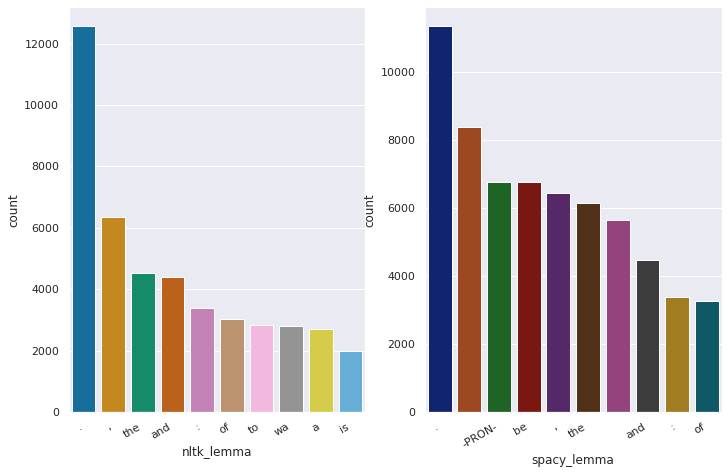

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
pd_df_nltk = counts_nltk.sort_values(['count'], ascending=False)
pd_df_spacy = counts_spacy.sort_values(['count'], ascending=False)
fig, ax =plt.subplots(1,2)
sns.barplot(x='nltk_lemma', y='count', data=pd_df_nltk[:10], ax=ax[0], palette='colorblind')
sns.barplot(x='spacy_lemma', y='count', data=pd_df_spacy[:10], ax=ax[1], palette='dark')
fig.autofmt_xdate()
fig.show()

What observations do you have? 

We might want to remove punctuation and very common words, so that we can better understand which the most frequent content words are instead.

There are many ways to filter text collections from non-content bearing words. The most common baseline approach is to use a predefined list of stopwords and to only keep alphabetic characters.

!NOTE! This step is probably worth spending some time on in your own use-cases!

We'll use a baseline approach here using the nltk stopword list, keeping only words without numericals, and lowercasing all words.

In [ ]:
counts_nltk = pd.Series([item.lower() for sublist in df.nltklemma for item in sublist if item.lower() not in stopwords.words('english') and item.isalpha()])
counts_spacy = pd.Series([item for sublist in df.spacylemma for item in sublist if item not in stopwords.words('english') and item.isalpha()])

In [ ]:
counts_nltk = counts_nltk.groupby(counts_nltk).size().rename_axis('nltk_lemma').reset_index(name='count')
counts_spacy = counts_spacy.groupby(counts_spacy).size().rename_axis('spacy_lemma').reset_index(name='count')

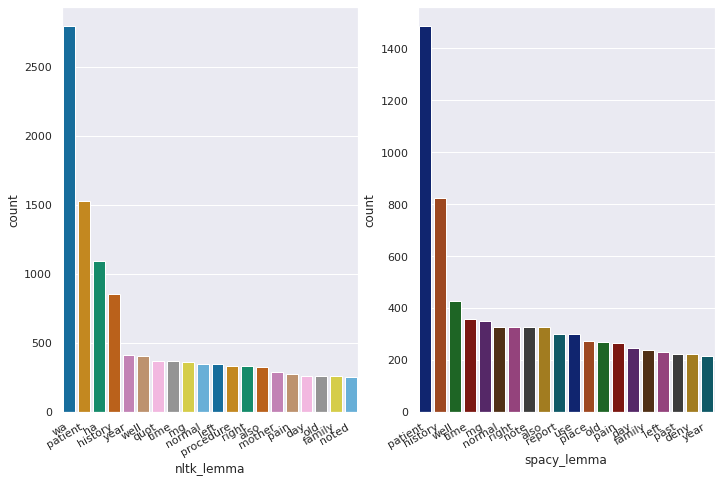

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
pd_df_nltk = counts_nltk.sort_values(['count'], ascending=False)
pd_df_spacy = counts_spacy.sort_values(['count'], ascending=False)
fig, ax =plt.subplots(1,2)
sns.barplot(x='nltk_lemma', y='count', data=pd_df_nltk[:20], ax=ax[0], palette='colorblind')
sns.barplot(x='spacy_lemma', y='count', data=pd_df_spacy[:20], ax=ax[1], palette='dark')
fig.autofmt_xdate()
fig.show()

What observations do you now make on this? Do you notice differences between the two NLP packages? Which one do you think seems to work best? Why or why not are there differences?

Let's also look at POS tag differences.

In [ ]:
df['nltkpos']

0      [NNP, NNP, NNP, :, NN, ., NNP, NNP, NNP, NNP, ...
1      [NNP, NNP, NNP, :, PRP, VBD, VBN, TO, VB, DT, ...
2      [NN, :, DT, NN, VBZ, DT, CD, :, NN, :, JJ, VBG...
3      [NNP, NNP, NNP, :, JJ, NN, IN, NN, ., NNP, NNP...
4      [NNP, CC, NNP, :, CD, ., NNP, ,, NN, ,, CC, NN...
                             ...                        
243    [JJ, NNP, :, CC, NN, :, DT, NN, NN, VBN, VBN, ...
244    [NNP, NNP, NNP, :, DT, NN, NN, VBD, TO, PRP, I...
245    [JJ, NNP, :, NNP, ., NNP, NNP, NNP, NNP, :, DT...
246    [NN, NNP, :, JJ, JJ, NN, NN, NNP, :, NN, ., NN...
247    [NNP, NNP, CD, ., NNP, NN, NN, ,, JJ, NN, ., C...
Name: nltkpos, Length: 248, dtype: object

In [ ]:
counts_nltk = pd.Series([item for sublist in df.nltkpos for item in sublist])
counts_spacy = pd.Series([item for sublist in df.spacypos for item in sublist])

In [ ]:
counts_nltk.head()

0    NNP
1    NNP
2    NNP
3      :
4     NN
dtype: object

In [ ]:
counts_nltk = counts_nltk.groupby(counts_nltk).size().rename_axis('nltk_pos').reset_index(name='count')
counts_spacy = counts_spacy.groupby(counts_spacy).size().rename_axis('spacy_pos').reset_index(name='count')

In [ ]:
counts_nltk.head()

,nltk_pos,count
0,#,58
1,$,122
2,'',108
3,(,235
4,),132


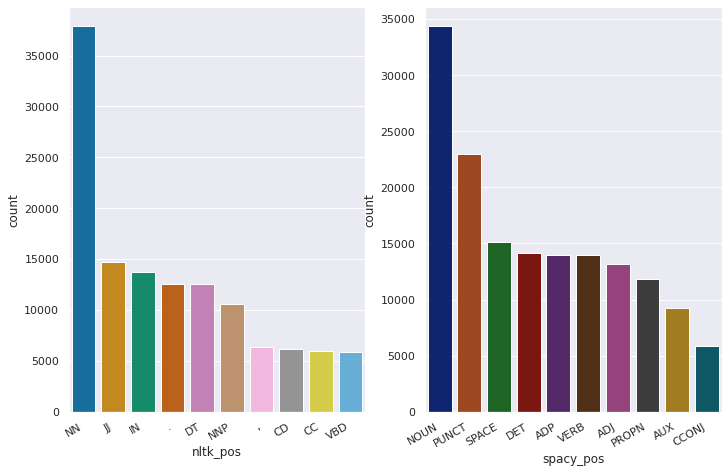

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
pd_df_nltk = counts_nltk.sort_values(['count'], ascending=False)
pd_df_spacy = counts_spacy.sort_values(['count'], ascending=False)
fig, ax =plt.subplots(1,2)
sns.barplot(x='nltk_pos', y='count', data=pd_df_nltk[:10], ax=ax[0], palette='colorblind')
sns.barplot(x='spacy_pos', y='count', data=pd_df_spacy[:10], ax=ax[1], palette='dark')
fig.autofmt_xdate()
fig.show()

What observations do you make? How can you use this information to inform your future NLP development for new use-cases?

## Ngrams

Another common representation in different NLP tasks is to look at 'ngrams'. These are n consecutive words in documents, which can be very useful to use for capturing common phrases and expressions.

scikit-learn has a function to generate ngrams that we can use to look at some different frequency distributions. We'll create a function to get common ngrams.

In [ ]:
#@title Default title text
def get_top_n_ngram(corpus, n=None, ngram_range=1, sw=None):
    vec = CountVectorizer(ngram_range=(ngram_range, ngram_range), stop_words=sw).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


Let's use this function to get the most common uni-, bi-, and trigrams in our corpus, and look at these.

Note that you can pass any ngram range you want to this function.

Also: note that you can choose to include or exclude stopwords for generating these ngrams.

In [ ]:
stopwords=None
#stopwords='english'

common_words_unigram = get_top_n_ngram(df['txt'], 20, ngram_range=1, sw=stopwords)
common_words_bigram = get_top_n_ngram(df['txt'], 20, ngram_range=2, sw=stopwords)
common_words_trigram = get_top_n_ngram(df['txt'], 20, ngram_range=3, sw=stopwords)

df1 = pd.DataFrame(common_words_unigram, columns = ['unigram' , 'count'])
df2 = pd.DataFrame(common_words_bigram, columns = ['bigram' , 'count'])
df3 = pd.DataFrame(common_words_trigram, columns = ['trigram' , 'count'])

In [ ]:
df1.groupby('unigram').sum()['count'].sort_values(ascending=False)
df2.groupby('bigram').sum()['count'].sort_values(ascending=False)
df3.groupby('trigram').sum()['count'].sort_values(ascending=False)

trigram
the patient was          305
the patient is           232
the patient has          116
history of present        99
of present illness        98
as well as                96
there is no               88
past medical history      86
review of systems         82
history the patient       71
he has been               58
with the patient          51
illness the patient       50
present illness the       49
patient has been          49
clear to auscultation     49
at this time              48
in the past               47
she has been              45
and draped in             45
Name: count, dtype: int64

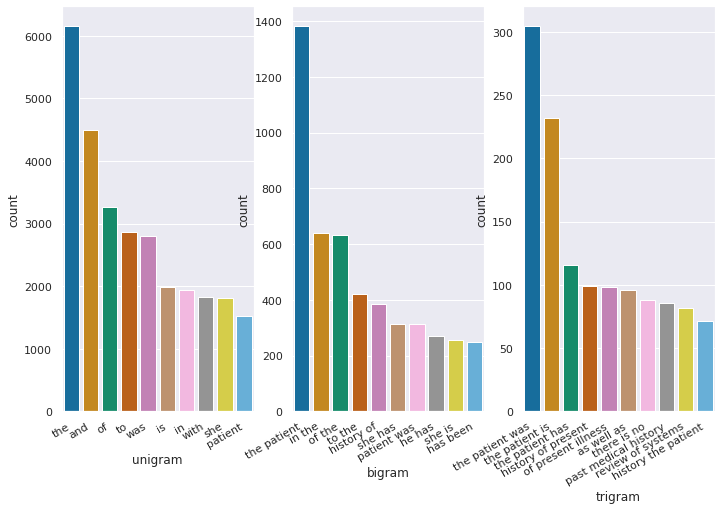

In [ ]:
fig, ax =plt.subplots(1,3)
sns.barplot(x='unigram', y='count', data=df1[:10], ax=ax[0], palette='colorblind')
sns.barplot(x='bigram', y='count', data=df2[:10], ax=ax[1], palette='colorblind')
sns.barplot(x='trigram', y='count', data=df3[:10], ax=ax[2], palette='colorblind')
fig.autofmt_xdate()
fig.show()

Try including stopwords and run again.

In [ ]:
common_words_unigram_wsw = get_top_n_ngram(df['txt'], 20, ngram_range=1, sw='english')
common_words_bigram_wsw = get_top_n_ngram(df['txt'], 20, ngram_range=2, sw='english')
common_words_trigram_wsw = get_top_n_ngram(df['txt'], 20, ngram_range=3, sw='english')

df1_wsw = pd.DataFrame(common_words_unigram_wsw, columns = ['unigram' , 'count'])
df2_wsw = pd.DataFrame(common_words_bigram_wsw, columns = ['bigram' , 'count'])
df3_wsw = pd.DataFrame(common_words_trigram_wsw, columns = ['trigram' , 'count'])

df1_wsw.groupby('unigram').sum()['count'].sort_values(ascending=False)
df2_wsw.groupby('bigram').sum()['count'].sort_values(ascending=False)
df3_wsw.groupby('trigram').sum()['count'].sort_values(ascending=False)

trigram
history present illness           98
past medical history              86
present illness patient           51
year old female                   39
known drug allergies              35
allergies known drug              33
examination vital signs           32
regular rate rhythm               32
social history patient            31
patient tolerated procedure       31
physical examination vital        31
clear auscultation bilaterally    30
abdomen soft nontender            27
physical examination general      27
lungs clear auscultation          27
year old white                    27
pupils equal round                25
white blood cell                  24
equal round reactive              23
prepped draped usual              22
Name: count, dtype: int64

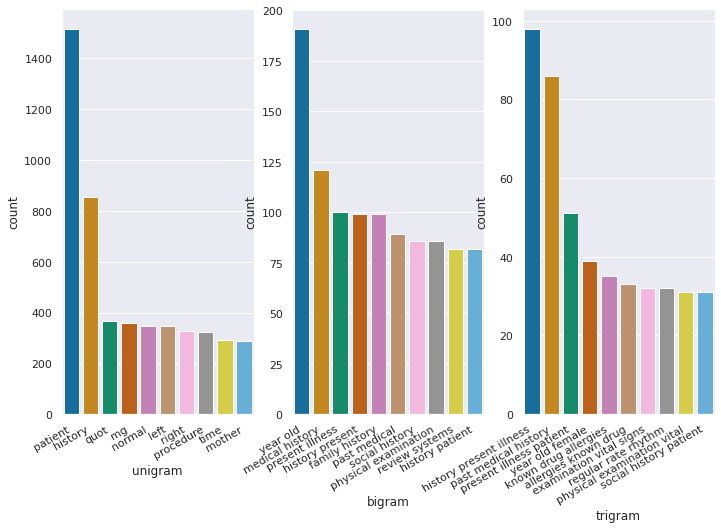

In [ ]:
fig, ax =plt.subplots(1,3)
sns.barplot(x='unigram', y='count', data=df1_wsw[:10], ax=ax[0], palette='colorblind')
sns.barplot(x='bigram', y='count', data=df2_wsw[:10], ax=ax[1], palette='colorblind')
sns.barplot(x='trigram', y='count', data=df3_wsw[:10], ax=ax[2], palette='colorblind')
fig.autofmt_xdate()
fig.show()